<a href="https://colab.research.google.com/github/trinalvf/final_year_project/blob/main/MachineLearning/ML_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Loading the Dataset ...
------------------------------------------------------------------------------

Logistic Regression ...
------------------------------------------------------------------------------

Confusion Matrix
[[1263    0]
 [  11 1226]]
Accuracy of Success = 99.56 %
Accuracy of Failure = 0.44 %
------------------------------------------------------------------------------
Learning and Predicting Time:  0:00:00.122619
------------------------------------------------------------------------------

K-NEAREST NEIGHBORS ...
------------------------------------------------------------------------------

Confusion Matrix
[[1263    0]
 [  24 1213]]
Accuracy of Success = 99.04 %
Accuracy of Failure = 0.96 %
------------------------------------------------------------------------------
Learning and Predicting Time:  0:00:00.211111
------------------------------------------------------------------------------

SUPPORT-VECTOR MACHINE ...
---------------------------------------------

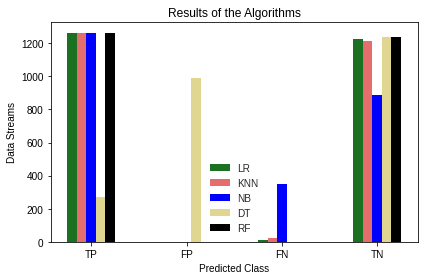

Learning and Predicting Time:  0:00:00.206804
------------------------------------------------------------------------------

RANDOM FOREST ...
------------------------------------------------------------------------------

Confusion Matrix
[[1263    0]
 [   0 1237]]
Accuracy of Success = 100.00 %
Accuracy of Failure = 0.00 %
------------------------------------------------------------------------------
Learning and Predicting Time:  0:00:00.097906
Time taken to run the script:  0:00:12.482179


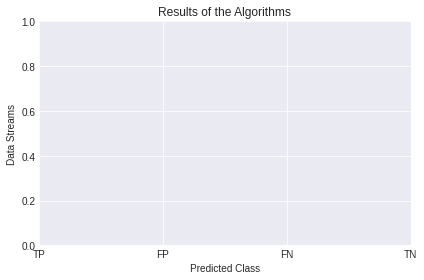

In [ ]:
class MachineLearning():

    def __init__(self):
        
        print("Loading the Dataset ...")
        
        self.counter = 0
        
        self.flow_dataset = pd.read_csv('/content/drive/MyDrive/dataset.csv')
        self.flow_dataset = self.flow_dataset.drop(columns=['flow_id','timestamp','flags','hard_timeout','idle_timeout'])

        self.flow_dataset1 = self.flow_dataset.iloc[:5000,:]
        self.flow_dataset2 = self.flow_dataset.iloc[125640:130640,:]
        self.flow_dataset = pd.concat([self.flow_dataset1, self.flow_dataset2], ignore_index=True)

        self.flow_dataset.iloc[:, 1] = self.flow_dataset.iloc[:, 1].str.replace('.', '')
        self.flow_dataset.iloc[:, 3] = self.flow_dataset.iloc[:, 3].str.replace('.', '')
        
        
        self.X_flow = self.flow_dataset.iloc[:, :-1].values
        self.X_flow = self.X_flow.astype('float64')
        
        self.y_flow = self.flow_dataset.iloc[:, -1].values

        self.X_flow_train, self.X_flow_test, self.y_flow_train, self.y_flow_test = train_test_split(self.X_flow, self.y_flow, test_size=0.25, random_state=0)

    def LR(self):
        
        print("------------------------------------------------------------------------------\n")
        print("Logistic Regression ...")

        self.classifier = LogisticRegression(solver='liblinear', random_state=0)
        self.Confusion_matrix()
        
    def KNN(self):

        print("------------------------------------------------------------------------------\n")
        print("K-NEAREST NEIGHBORS ...")

        self.classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
        self.Confusion_matrix()

    def SVM(self):

        print("------------------------------------------------------------------------------\n")
        print("SUPPORT-VECTOR MACHINE ...")

        self.classifier = SVC(kernel='rbf', random_state=0)
        self.Confusion_matrix()
        
    def NB(self):

        print("------------------------------------------------------------------------------\n")
        print("NAIVE-BAYES ...")

        self.classifier = GaussianNB()
        self.Confusion_matrix()
        
        
    def DT(self):

        print("------------------------------------------------------------------------------\n")
        print("DECISION TREE ...")

        self.classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
        self.Confusion_matrix()
        
    def RF(self):

        print("------------------------------------------------------------------------------\n")
        print("RANDOM FOREST ...")

        self.classifier = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0)
        self.Confusion_matrix()
        
    def Confusion_matrix(self):
        self.counter += 1
        
        self.flow_model = self.classifier.fit(self.X_flow_train, self.y_flow_train)

        self.y_flow_pred = self.flow_model.predict(self.X_flow_test)

        print("------------------------------------------------------------------------------\n")

        print("Confusion Matrix")
        cm = confusion_matrix(self.y_flow_test, self.y_flow_pred)
        print(cm)

        accuracy = accuracy_score(self.y_flow_test, self.y_flow_pred)

        print("Accuracy of Success = {0:.2f} %".format(accuracy*100))
        fail = 1.0 - accuracy
        print("Accuracy of Failure = {0:.2f} %".format(fail*100))
        print("------------------------------------------------------------------------------")
        
        x = ['TP','FP','FN','TN']
        x_indexes = np.arange(len(x))
        width = 0.10
        plt.xticks(ticks=x_indexes, labels=x)
        plt.title("Results of the Algorithms")
        plt.xlabel('Predicted Class')
        plt.ylabel('Data Streams')
        plt.tight_layout()
        plt.style.use("seaborn-darkgrid")
        # plt.style.use("dark_background")
        # plt.style.use("ggplot")
        if self.counter == 1:
            y1 = [cm[0][0],cm[0][1],cm[1][0],cm[1][1]]
            plt.bar(x_indexes-2*width,y1, width=width, color="#1b7021", label='LR')
            plt.legend()
        if self.counter == 2:
            y2 = [cm[0][0],cm[0][1],cm[1][0],cm[1][1]]
            plt.bar(x_indexes-width,y2, width=width, color="#e46e6e", label='KNN')
            plt.legend()
        if self.counter == 3:
            y3 = [cm[0][0],cm[0][1],cm[1][0],cm[1][1]]
            plt.bar(x_indexes,y3, width=width, color="#0000ff", label='NB')
            plt.legend()
        if self.counter == 4:
            y4 = [cm[0][0],cm[0][1],cm[1][0],cm[1][1]]
            plt.bar(x_indexes+width,y4, width=width, color="#e0d692", label='DT')
            plt.legend()
        if self.counter == 5:
            y5 = [cm[0][0],cm[0][1],cm[1][0],cm[1][1]]
            plt.bar(x_indexes+2*width,y5, width=width, color="#000000", label='RF')
            plt.legend()
            plt.show()

def main():


  start_script = datetime.now()
    
  ml = MachineLearning()
    
  start = datetime.now()
  ml.LR()
  end = datetime.now()
  print("Learning and Predicting Time: ", (end-start)) 
    
  start = datetime.now()
  ml.KNN()
  end = datetime.now()
  print("Learning and Predicting Time: ", (end-start))
    
  start = datetime.now()
  ml.SVM()
  end = datetime.now()
  print("LEARNING and PREDICTING Time: ", (end-start))
    
  start = datetime.now()
  ml.NB()
  end = datetime.now()
  print("Learning and Predicting Time: ", (end-start))
    
  start = datetime.now()
  ml.DT()
  end = datetime.now()
  print("Learning and Predicting Time: ", (end-start))
    
  start = datetime.now()
  ml.RF()
  end = datetime.now()
  print("Learning and Predicting Time: ", (end-start))
    
  end_script = datetime.now()
  print("Time taken to run the script: ", (end_script-start_script))

if __name__ == "__main__":
  main()